<a href="https://colab.research.google.com/github/Jaswithagadde/internship/blob/main/Exploratory_Data_Analsis(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔍 Basic Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

📊 Summary Statistics (Numerical & Categorical):

        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN

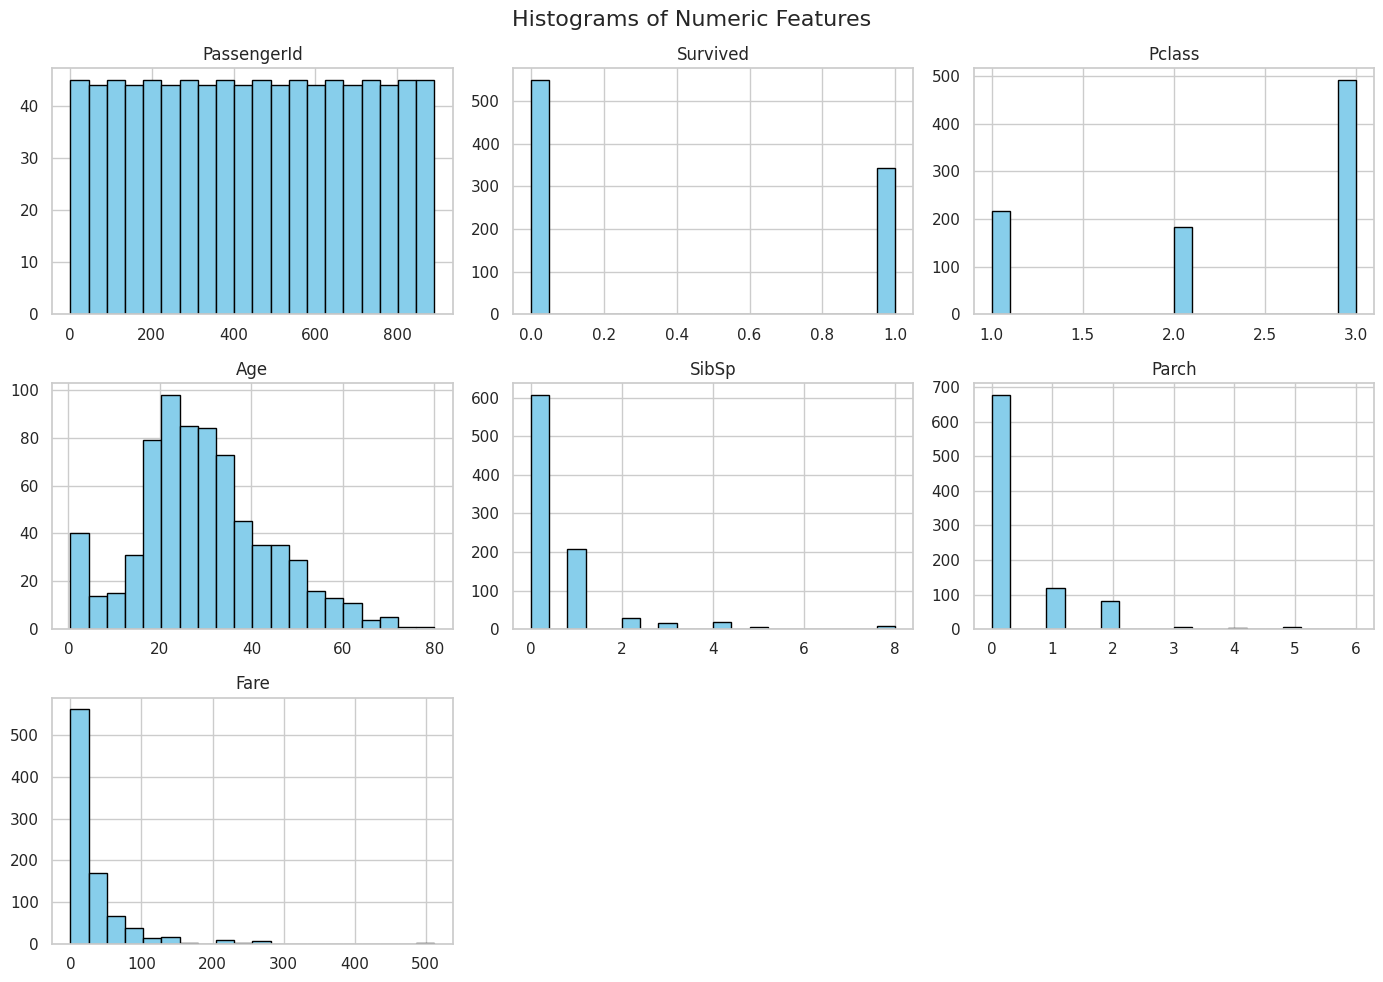

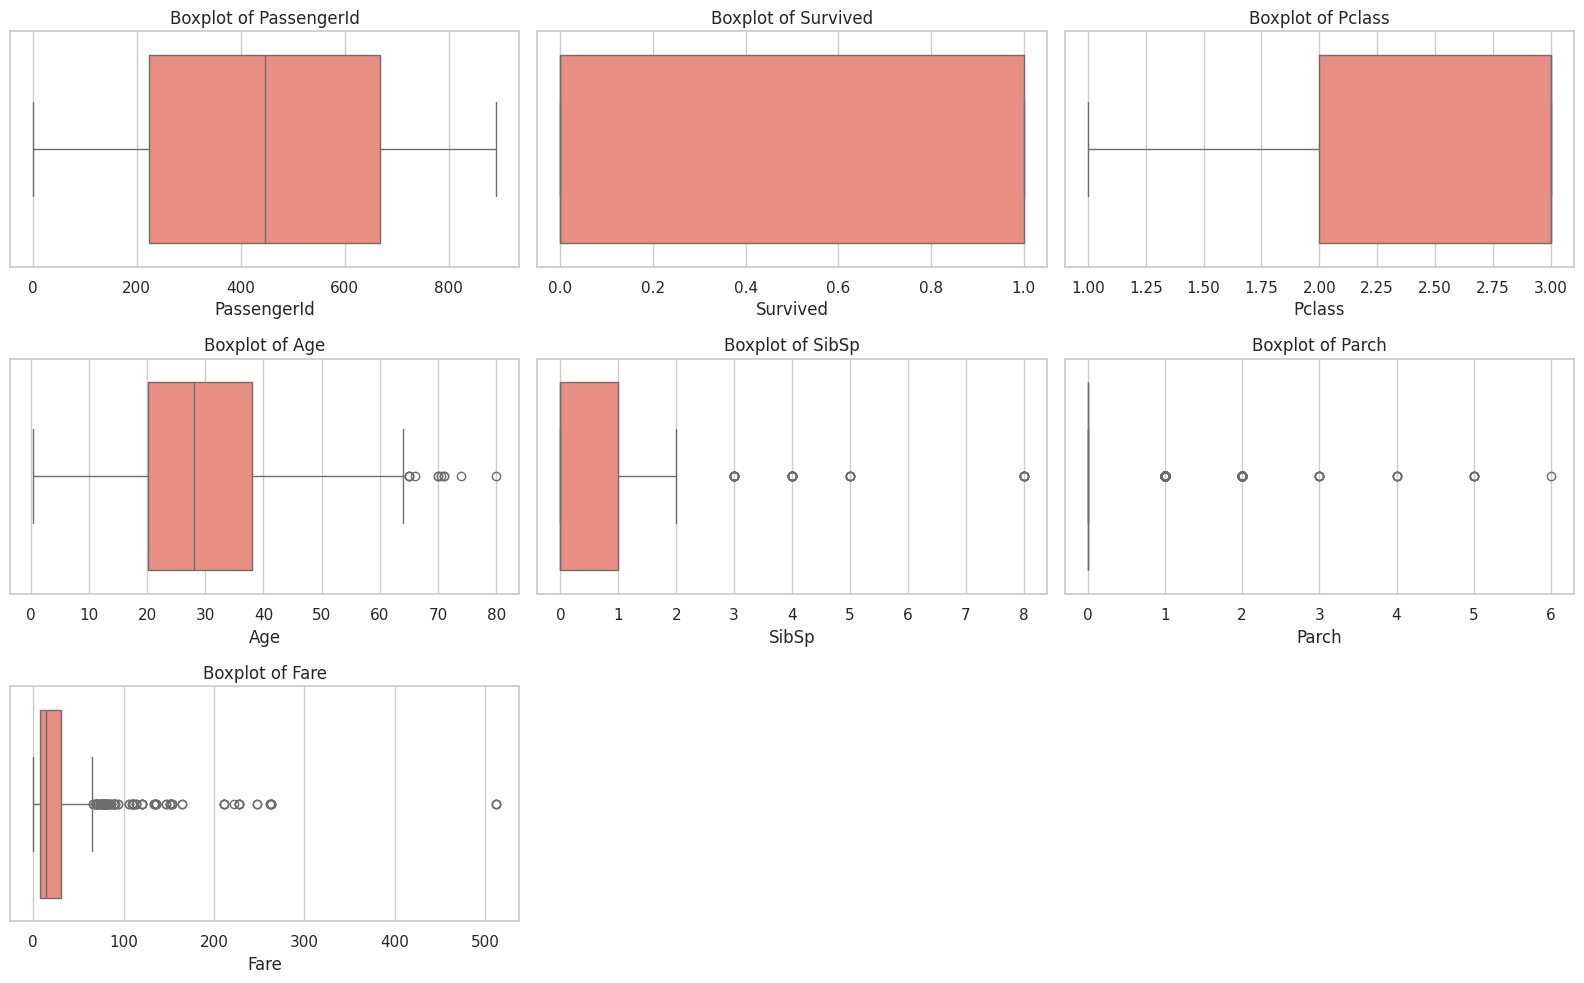

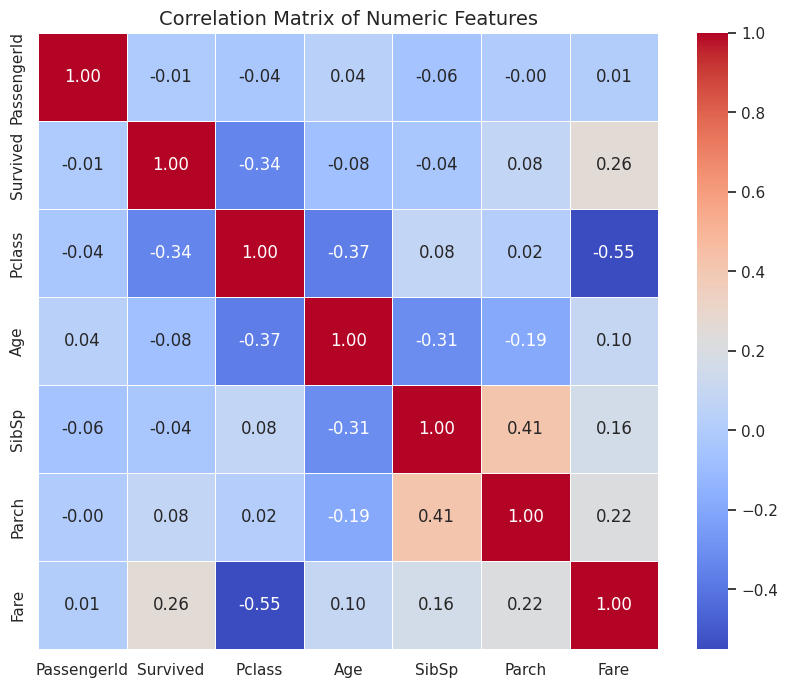

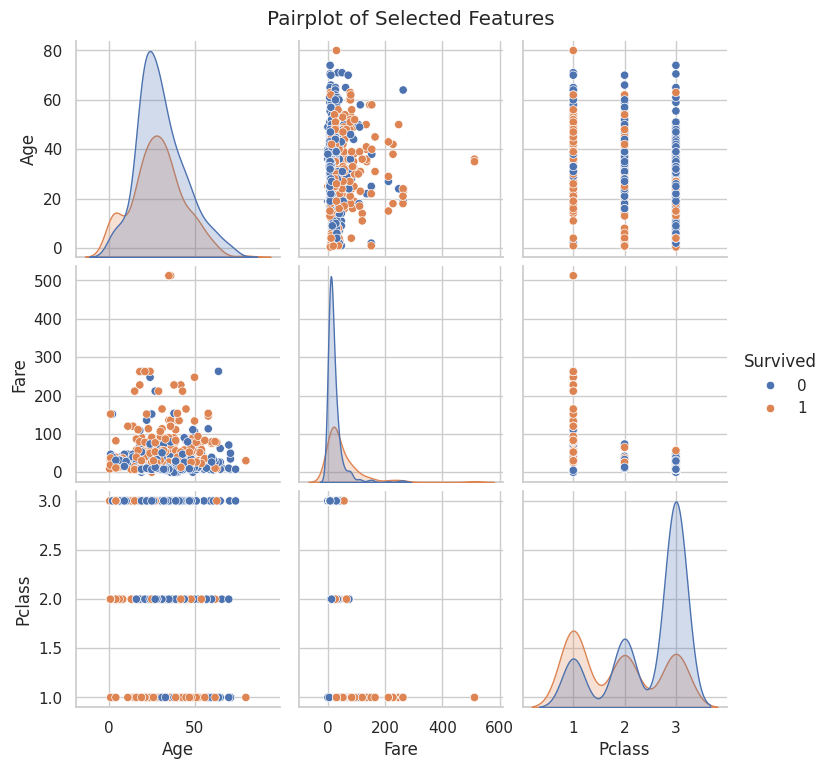

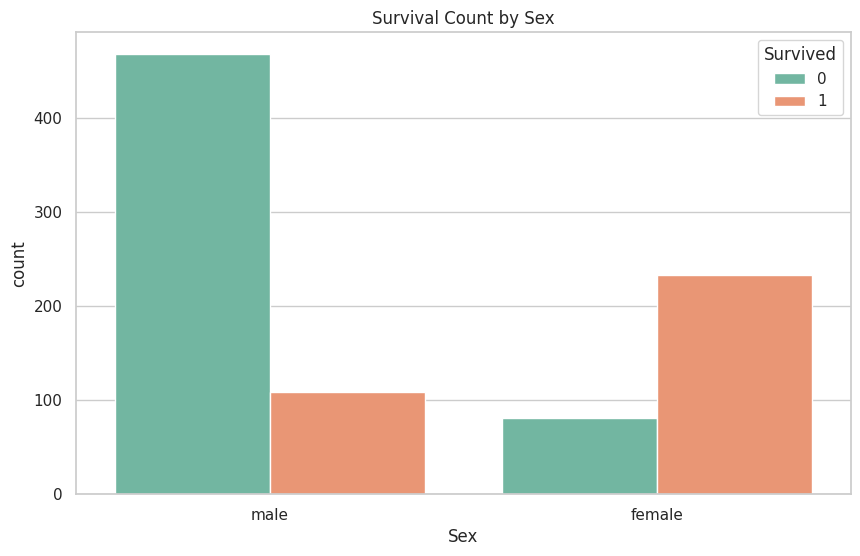

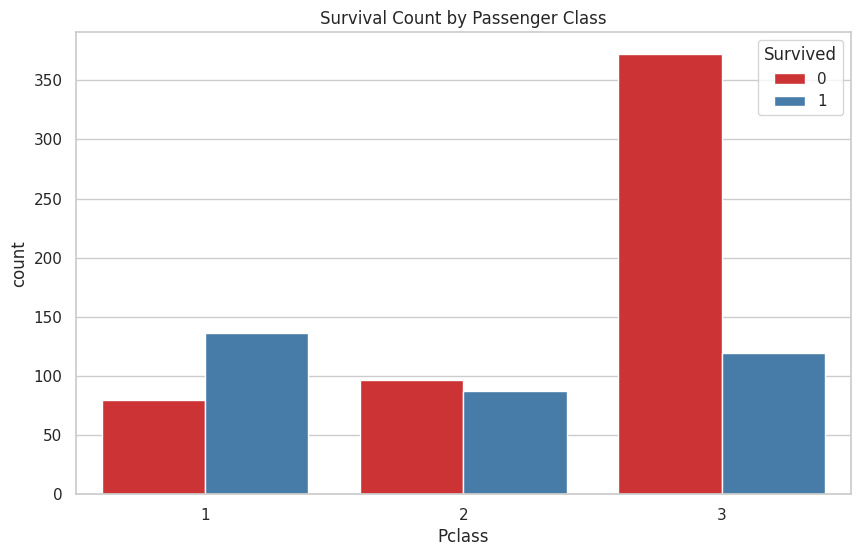

<ipython-input-3-fbcd19ff6650>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Survived', y='Age', palette='muted')


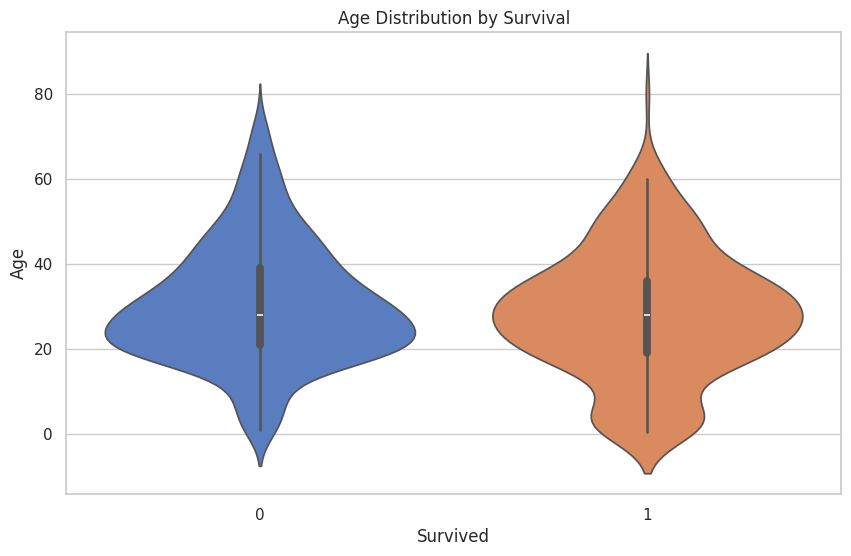

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

print("🔍 Basic Information:\n")
print(df.info())

print("\n📊 Summary Statistics (Numerical & Categorical):\n")
print(df.describe(include='all'))

print("\n❗ Missing Values Count:\n")
print(df.isnull().sum())

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[numeric_cols].hist(bins=20, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

import math

plt.figure(figsize=(16, 10))

n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features', fontsize=14)
plt.show()

sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']].dropna(), hue='Survived')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

sns.countplot(data=df, x='Sex', hue='Survived', palette='Set2')
plt.title('Survival Count by Sex')
plt.show()

sns.countplot(data=df, x='Pclass', hue='Survived', palette='Set1')
plt.title('Survival Count by Passenger Class')
plt.show()

sns.violinplot(data=df, x='Survived', y='Age', palette='muted')
plt.title('Age Distribution by Survival')
plt.show()

fig = px.box(df, x="Pclass", y="Fare", color="Survived",
             title="💰 Fare Distribution by Passenger Class and Survival",
             labels={"Fare": "Fare", "Pclass": "Passenger Class"})
fig.show()
